IMPORT Required MODULES

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

Read the file

In [43]:
data=pd.read_excel("C:/Users/durga prasad/Downloads/Copper_Set.xlsx")

In [44]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


DEALING WITH WRONG FORMAT DATA

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [46]:
data['delivery date'] = pd.to_datetime(data['delivery date'])
data['quantity tons']=pd.to_numeric(data['quantity tons'],errors='coerce')
data['customer']=pd.to_numeric(data['customer'],errors='coerce')
data['country']=pd.to_numeric(data['country'],errors='coerce')
data['application']=pd.to_numeric(data['application'],errors='coerce')
data['thickness']=pd.to_numeric(data['thickness'],errors='coerce')
data['width']=pd.to_numeric(data['width'],errors='coerce')
data['material_ref']=data['material_ref'].str.lstrip('0')
data['product_ref']=pd.to_numeric(data['product_ref'],errors='coerce')
data['item_date'] = pd.to_datetime(data['item_date'])
data['selling_price']=pd.to_numeric(data['selling_price'],errors='coerce')


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181672 non-null  datetime64[ns]
 2   quantity tons  181672 non-null  float64       
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181672 non-null  datetime64[ns]
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4

DEALING WITH NULL VALUES

In [48]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [49]:
data['material_ref'].fillna('UNKNOWN',inplace=True)

In [50]:
data.shape

(181673, 14)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181672 non-null  datetime64[ns]
 2   quantity tons  181672 non-null  float64       
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   181673 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181672 non-null  datetime64[ns]
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4

In [53]:
data=data.dropna()

In [54]:
data.shape

(181635, 14)

In [55]:
data['delivery_time'] = (data['delivery date'] - data['item_date']).dt.total_seconds() # CALCULATING DIFFERENCES IN SECONDS

#ASPECT RATIO OF COPPER AND TOTAL AMOUNT IN CURRENCY
data['aspect_ratio'] = data['width'] / data['thickness']
data['total_amount'] = data['quantity tons'] * data['selling_price']

#DROPPING IRRELEVANT FEATURES
data.drop(['item_date', 'delivery date'], axis=1, inplace=True)

In [56]:
data=data.drop(['id','material_ref'],axis=1)

In [57]:
data.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time,aspect_ratio,total_amount
count,1.816350e+05,1.816350e+05,181635.000000,181635.000000,181635.000000,181635.000000,1.816350e+05,1.816350e+05,1.816350e+05,181635.000000,1.816350e+05
mean,5.876103e+03,3.023251e+07,44.893088,25.616104,2.564171,1295.267784,4.740394e+08,1.918346e+03,2.792305e-06,1103.827794,3.557361e+06
std,2.349320e+06,1.005621e+05,24.404255,17.754082,6.572569,261.641656,7.175422e+08,3.318294e+05,2.403599e-05,846.884018,1.371925e+09
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03,-1.981700e-05,0.416667,-1.202000e+06
25%,1.096843e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02,1.700000e-07,416.666667,9.020483e+03
50%,3.036395e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02,2.900000e-07,805.555556,2.438615e+04
75%,6.716187e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02,8.899000e-06,1714.285714,5.629732e+04
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08,1.009970e-02,5555.000000,5.830000e+11


In [58]:
for i in data.select_dtypes(include=['int64', 'float64']):
    iqr = data[i].quantile(0.75) - data[i].quantile(0.25)
    upper_threshold = data[i].quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
    lower_threshold = data[i].quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
    data = data.copy()
    data[i] = data[i].clip(lower_threshold, upper_threshold)

    

In [59]:
data.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,delivery_time,aspect_ratio,total_amount
count,181635.000000,1.816350e+05,181635.000000,181635.000000,181635.000000,181635.000000,1.816350e+05,181635.000000,1.816350e+05,181635.000000,181635.000000
mean,49.175258,3.023266e+07,44.893088,25.606860,2.244998,1297.027011,4.740394e+08,819.115654,2.735619e-06,1101.452814,40037.707151
std,47.997119,7.128467e+04,24.404255,17.718831,1.890409,248.969753,7.175422e+08,209.088723,4.009940e-06,838.076399,40246.835305
min,-73.321733,3.007159e+07,25.000000,2.000000,0.180000,700.000000,6.117280e+05,243.000000,-1.292350e-05,0.416667,-61894.778545
25%,10.968428,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,669.000000,1.700000e-07,416.666667,9020.482794
50%,30.363953,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,812.000000,2.900000e-07,805.555556,24386.154274
75%,67.161869,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,953.000000,8.899000e-06,1714.285714,56297.323687
max,151.452030,3.040571e+07,113.000000,87.500000,6.450000,1980.000000,1.722208e+09,1379.000000,2.199250e-05,3660.714286,127212.585027


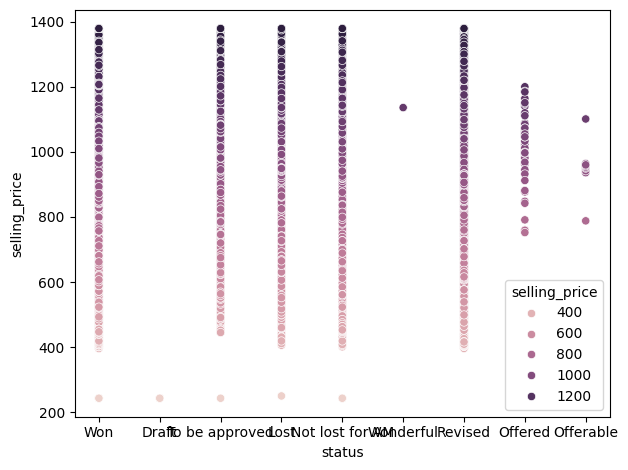

In [60]:
# Exclude the target variable from the loop
sns.scatterplot(data=data, x='status', y='selling_price', hue='selling_price')

plt.tight_layout()
plt.show()

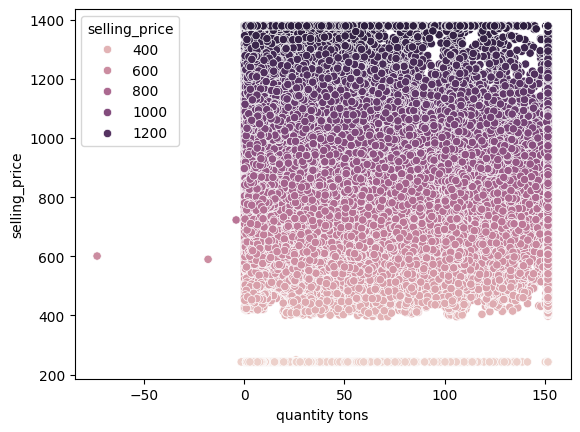

In [61]:
sns.scatterplot(data=data, x='quantity tons', y='selling_price', hue='selling_price')
plt.show()

In [41]:
data

<Axes: >

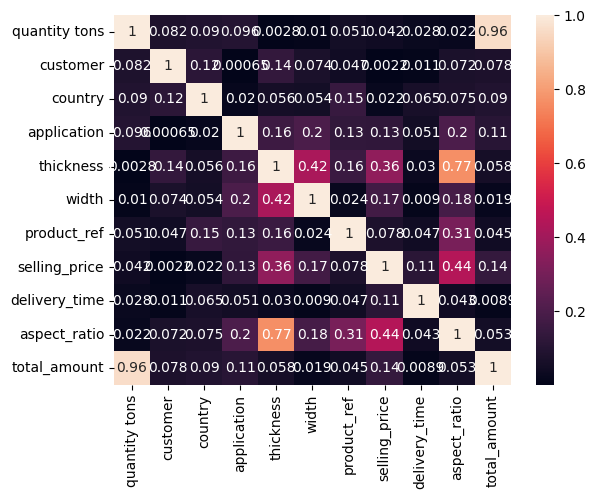

In [63]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr().abs(),  annot=True)

In [66]:
data_plotting=data.copy()

PLOTTING OUTLIER

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_7680\3165417283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plotting['quantity tons'])  #skewed


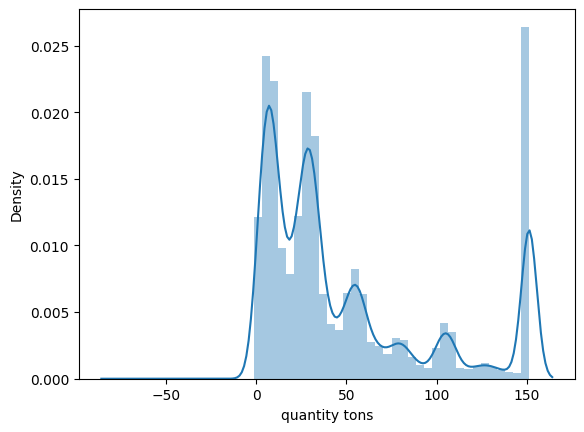

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_7680\3165417283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plotting['country'])


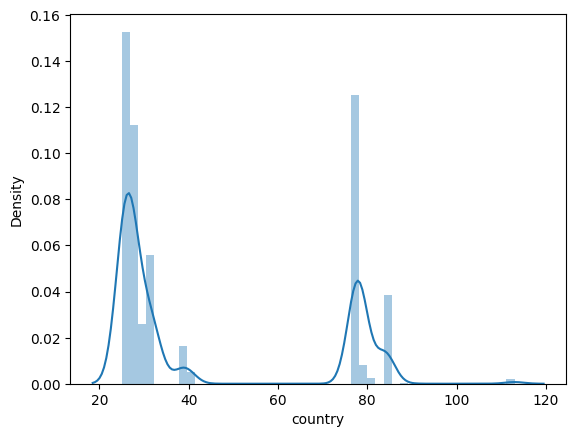

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_7680\3165417283.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plotting['application'])


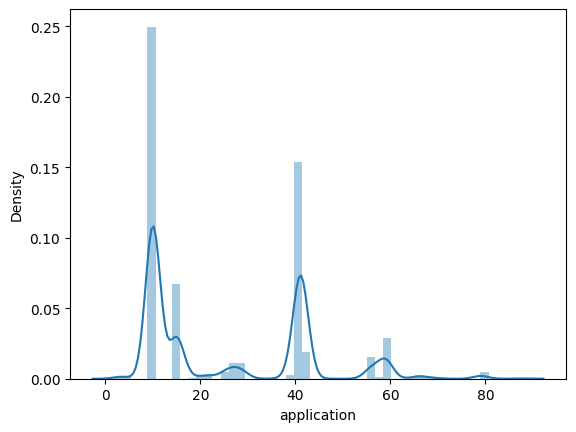

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_7680\3165417283.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plotting['thickness']) #skewed


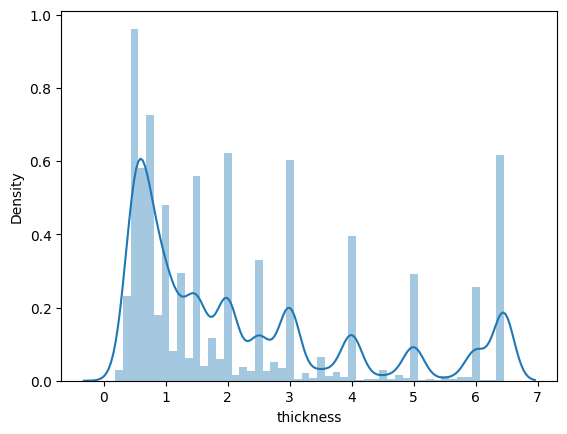

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_7680\3165417283.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plotting['width'])


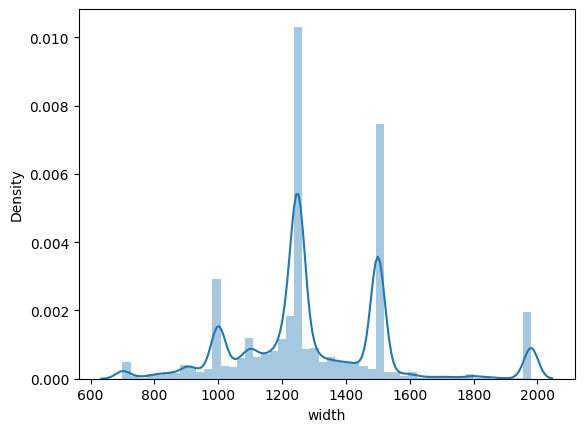

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_7680\3165417283.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plotting['selling_price']) #skewed


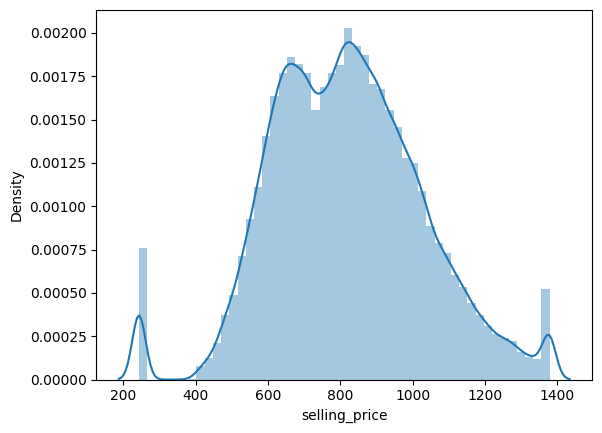

In [67]:
sns.distplot(data_plotting['quantity tons'])  #skewed
plt.show()
sns.distplot(data_plotting['country'])
plt.show()
sns.distplot(data_plotting['application'])
plt.show()
sns.distplot(data_plotting['thickness']) #skewed
plt.show()
sns.distplot(data_plotting['width'])
plt.show()
sns.distplot(data_plotting['selling_price']) #skewed
plt.show()




In [78]:
len(product)

33

In [80]:
st.set_page_config(layout='wide')
st.write("""
<div style='text-align:center'>
    <h1 style='color:#5e17eb;'>Industrial Copper Modeling Application</h1>
</div>
""", unsafe_allow_html=True)
tab1,tab2=st.tabs(['Precdict Selling Price','Predic status'])
with tab1:
    product=data['product_ref'].unique().tolist()
    status_options=data['status'].unique().tolist()
    item_type_options=data['item type'].unique().tolist()
    country_options=data['country'].unique().tolist()
    application_options=data['application'].tolist()
    with st.form("my_form"):
        col1,col2,col3=st.columns([2,5,2])
        with col1:
            status = st.selectbox("Status", status_options, key=1)
            item_type = st.selectbox("Item Type", item_type_options, key=2)
            country = st.selectbox("Country", sorted(country_options), key=3)
            application = st.selectbox("Application", sorted(application_options), key=4)
            product_ref = st.selectbox("Product Reference", product, key=5)
        
        with col3:
            st.write(
                f'<h5 style="color:#ee4647;">NOTE: Min & Max given for reference, you can enter any value</h5>',
                unsafe_allow_html=True)
            quantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
            thickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
            width = st.text_input("Enter width (Min:1, Max:2990)")
            customer = st.text_input("customer ID (Min:12458, Max:30408185)")
            submit_button = st.form_submit_button(label="PREDICT SELLING PRICE")
            st.markdown("""
                    <style>
                    div.stButton > button:first-child {
                        background-color: #004aad;
                        color: white;
                        width: 100%;
                    }
                    </style>
                """, unsafe_allow_html=True)

2024-01-06 13:11:08.786 
  command:

    streamlit run c:\Users\durga prasad\Desktop\project\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


TypeError: LayoutsMixin.columns() takes 2 positional arguments but 4 were given